# Figure 2: Population sizes, mutation accumulation, and extinction times

In [1]:
run doomed.py

## Stochastic simulations

Parameters:

* mutation rate: $u=0.02$

* deleterious effect of a mutation: $s=0.06$

* founding population: $n_0=10^3$ mutation-free individuals

* $10^4$ replicate populations

In [2]:
u = 0.02
s = 0.06
n0 = 1000

The following cell performs simulations and saves the resulting data.  This takes approximately 10 minutes.

In [24]:
%%time
pop_sizes, mutations, ext_times = simult([n0], 10000, s, u, K=np.infty)
np.savetxt('data/fig2pop_sizes.csv', pop_sizes, fmt='%i', delimiter=',')
np.savetxt('data/fig2mutations.csv', mutations, fmt='%1.8f', delimiter=',')
np.savetxt('data/fig2ext_times.csv', ext_times, fmt='%i', delimiter=',')

CPU times: user 2min 5s, sys: 1.72 s, total: 2min 7s
Wall time: 3min 41s


To use previously saved data, uncomment the commands in the following cell and run them.

In [112]:
# pop_sizes = np.genfromtxt('data/fig2pop_sizes.csv', delimiter=',')
# mutations = np.genfromtxt('data/fig2mutations.csv', delimiter=',')
# ext_times = np.genfromtxt('data/fig2ext_times.csv', delimiter=',')

## Population size

### Simulations

In [182]:
tmax = 401
t = np.arange(tmax)
mean_n = pop_sizes.mean(axis=1)[:tmax]
std_n = pop_sizes.std(axis=1, ddof=1)[:tmax]

### Theory

In [183]:
expect_n = [N(1000, s, u, t) for t in range(tmax)]

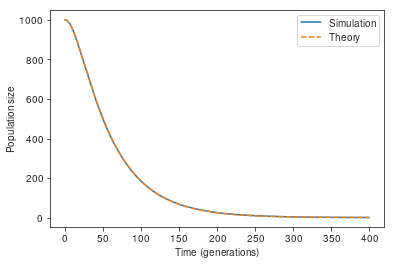

In [184]:
plt.plot(t, mean_n, label='Simulation')
plt.plot(t, expect_n, '--', label='Theory')
plt.xlabel('Time (generations)')
plt.ylabel('Population size')
plt.legend()
plt.savefig('pop_size.pdf');

## Number of mutations

### Simulations

In [50]:
print('Extinction times (simulations)')
print('  min:', ext_times.min())
print('  max:', ext_times.max())

Extinction times (simulations)
  min: 84
  max: 735


In [169]:
tmax = 81
tmp = mutations[:tmax,:]
t = np.arange(tmax)
mean_mut = tmp.mean(axis=1)
std_mut = tmp.std(axis=1, ddof=1)

### Theory

In [170]:
expect_mut = [mut(s, u, t) for t in range(tmax)]

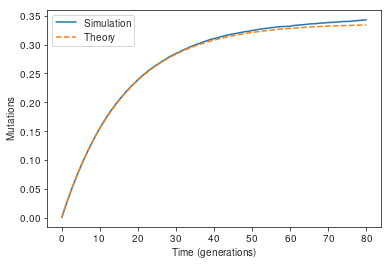

In [171]:
plt.plot(t, mean_mut, label='Simulation')
plt.plot(t, expect_mut, '--', label='Theory')
plt.xlabel('Time (generations)')
plt.ylabel('Mutations')
plt.legend()
plt.savefig('mutations.pdf');

In [185]:
!open pop_size.pdf

In [189]:
expect_n[40]

607.5270899125951

## Extinction time

In [72]:
p = []
p1 = p_extinct(n0, 50, 50, s, u)
for t in range(51, 601):
    p2 = p_extinct(n0, t, 50, s, u)
    p.append(p2 - p1)
    p1 = p2
p = np.array(p)

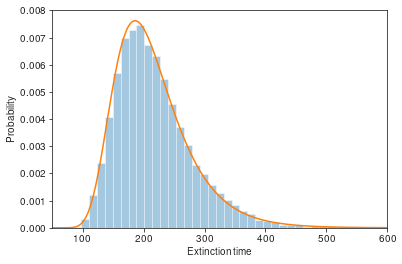

In [73]:
sns.distplot(ext_times, norm_hist=True, kde=False)
plt.plot(range(50, 600), p)
plt.xlim(50, 600)
plt.xlabel('Extinction time')
plt.ylabel('Probability');

### Mean

In [173]:
np.percentile(ext_times, [2.5, 97.5])

array([126., 369.])

In [176]:
p_extinct(n0, 126, 50, s, u)

0.024876793282003307

In [180]:
p_extinct(n0, 369, 50, s, u) - p_extinct(n0, 126, 50, s, u)

0.9504584100194997

In [81]:
# simulations
print(ext_times.mean(), 2 * ext_times.std(ddof=1) / 100)

217.9097 1.2681747218252333


In [75]:
# theory
T(n0, 50, s, u, 1e-8)

215.6014812186036

In [103]:
215.6014812186036 * 1.5

323.4022218279054

In [117]:
T(n0, 50, s/9.4662, u, 1e-8)

323.40163121689244

In [145]:
T(n0, 50, s/9.4662, 2.176467*u, 1e-8)

215.60145102182565

In [161]:
T(n0, 50, s, u/1.727238, 1e-8)

323.4022532565775

In [168]:
T(n0, 20, 1, u/1.727238, 1e-8)

318.20348937716835

## Plot

Extinction times in A
 Median: 195.0
   Mean: 211.06
Std dev: 71.98906096039303


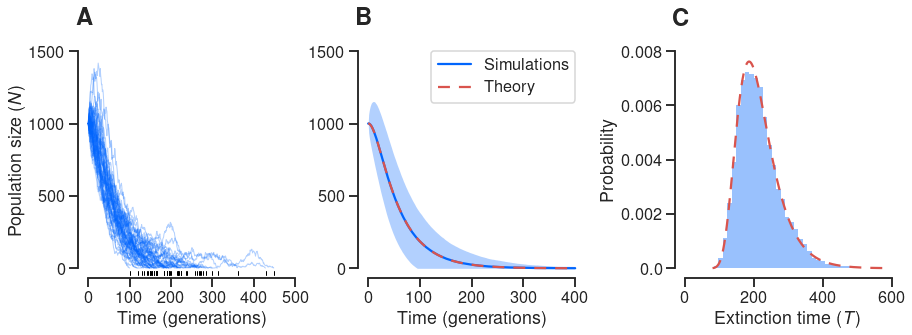

In [279]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(12.5, 4.5))

red = sns.xkcd_rgb["pale red"]
blu = sns.xkcd_rgb["bright blue"]
gre = sns.xkcd_rgb["medium green"]

fig.subplots_adjust()

set_up_axes(ax1, xmin=0, xmax=500, xstep=100, ymin=0, ymax=1500, ystep=500, rnd=0, 
    ylabel=r'Population size $(N)$', xlabel='Time (generations)', part_label=r'\textbf{A}')
set_up_axes(ax2, xmin=0, xmax=400, xstep=100, ymin=0, ymax=1500, ystep=500, rnd=0, 
    ylabel=r'', xlabel='Time (generations)', part_label=r'\textbf{B}')
set_up_axes(ax3, xmin=0, xmax=600, xstep=200, ymin=0, ymax=.008, ystep=.002, rnd=3, 
    ylabel='Probability', xlabel='Extinction time $(T)$', part_label=r'\textbf{C}')

ax1.set_position([.092, .189, .23, .67])
ax2.set_position([.403, .189, .23, .67])
ax3.set_position([.755, .189, .23, .67])

x = []
for i in range(3755, 3805):
    n = pop_size[:, i]
    ax1.plot(n[n > 0], color=blu, alpha=.3, lw=1, clip_on=False)
    ax1.plot([extinct_time[i]] * 2, [-19, -45], 'k-', clip_on=False, lw=1)
    x.append(extinct_time[i])
print('Extinction times in A\n Median:', np.median(x))
print('   Mean:', np.mean(x))
print('Std dev:', np.std(x, ddof=1))

lo = mean_n - 2 * std_n
lo[lo<0] = 0
ax2.fill_between(t, mean_n + 2 * std_n, lo, color=blu, alpha=.3, clip_on=False, lw=0)
ax2.plot(t, mean_n, clip_on=False, label='Simulations', color=blu)
ax2.plot(t, expect_n, '--', color=red, clip_on=False, label='Theory', dashes=[5.3, 4.])
# ax2.plot(t, 1000 * np.exp(.3333 - .02 * t), label='Approx', color=gre)
ax2.legend(bbox_to_anchor=(1.04, 1.04))

ax3.plot(range(80, 587), p, '--', color=red, clip_on=False, dashes=[5.3, 4.])
sns.distplot(extinct_time, norm_hist=True, kde=False, ax=ax3, color=blu, hist_kws=dict(linewidth=0))
ax3.set_xticklabels(range(0, 601, 200))

plt.savefig('../figures/fig2.pdf')